In [1]:
import json
import os
import sys
import pandas as pd
import numpy as np
from __future__ import print_function

#rdkit modules
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator as Calculator


#scikit modules
#from sklearn.linear_model import Lasso
from sklearn.svm import SVR
#from sklearn.preprocessing import StandardScaler

#plot modules and formatting
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("figure", facecolor="white")
params = {
    'lines.markersize' : 10,
    'axes.labelsize': 20,
    'font.size': 20,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': False,
   }
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

#grab our checkName code
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import salty

In [2]:
#load numpy data and Descripor list
X = np.loadtxt('../salty/data/salts_with_descriptors')
f = open('../salty/data/Deslist','r')
Deslist = []
for line in f:
    Deslist.append("Cation %s " % line.strip('\n\t'))
f = open('../salty/data/Deslist','r')
for line in f:
    Deslist.append("Anion %s " % line.strip('\n\t'))
Deslist.append("Temperature")
Deslist.append("Pressure")
Deslist.append("Density")

X = X[~np.isnan(X).any(axis=1)]

n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)
print(len(Deslist))

3659 190
191


In [3]:
n_train = int(n*0.8)
n_test  = n - n_train
X = np.random.permutation(X)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = X[:n_train,:-1]
Y_train[:] = np.log(X[:n_train,-1])

X_test[:] = X[n_train:,:-1]
Y_test[:] = np.log(X[n_train:,-1])

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2927, 190)
(732, 190)
(2927,)
(732,)


0.779350079499


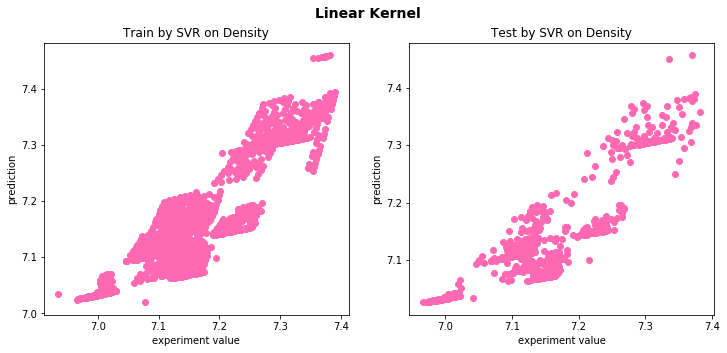

In [54]:
#linear kernel
clf3 = SVR(kernel='linear', C=1.0)
clf3.fit(X_train,Y_train)
print(clf3.score(X_test, Y_test))

fig = plt.figure(figsize=(12,5))
fig.suptitle('Linear Kernel', fontsize=14, fontweight='bold')

plt.subplot(121)
plt.plot(Y_train,clf3.predict(X_train),"o",color ='hotpink')
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Train by SVR on Density')

plt.subplot(122)
plt.plot(Y_test,clf3.predict(X_test),"o",color ='hotpink')
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Test by SVR on Density')
plt.show()

0.994359482076


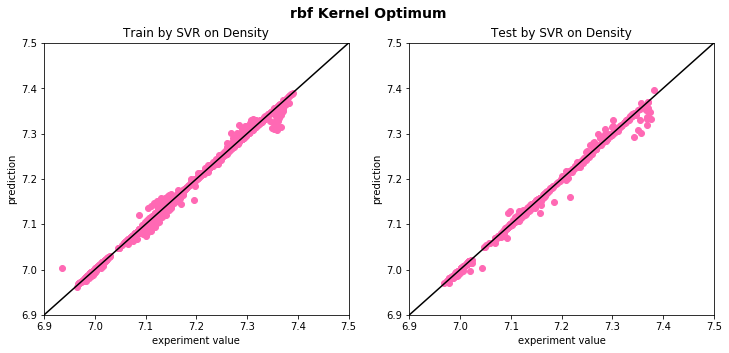

In [55]:
#rbf kernel adjusted to optimum
clf = SVR(C=100.0, epsilon=0.0001, gamma=0.000001, max_iter=1000000)
clf.fit(X_train,Y_train)
print(clf.score(X_test, Y_test))

fig = plt.figure(figsize=(12,5))
fig.suptitle('rbf Kernel Optimum', fontsize=14, fontweight='bold')

plt.subplot(121)
plt.plot(Y_train,clf.predict(X_train),"o",color ='hotpink')
plt.plot(np.arange(6.9,7.5,0.0001),np.arange(6.9,7.5,0.0001),color = 'black')
plt.axis([6.9,7.5,6.9,7.5])
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Train by SVR on Density')

plt.subplot(122)
plt.plot(Y_test,clf.predict(X_test),"o",color ='hotpink')
plt.plot(np.arange(6.9,7.5,0.0001),np.arange(6.9,7.5,0.0001),color = 'black')
plt.axis([6.9,7.5,6.9,7.5])
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Test by SVR on Density')
plt.show()

In [38]:
#coco used
clf = SVR(C=1, epsilon=0.0001,max_iter=100000)
clf.fit(X_train,Y_train)
print(clf.score(X_test, Y_test))

0.726621485483


In [35]:
clf3 = SVR(kernel='linear', C=10)
clf3.fit(X_train,Y_train)
print(clf3.score(X_test, Y_test))

0.779350079499


In [32]:
clf2 = SVR(kernel='rbf', C=200.0, gamma=0.0000001)
clf2.fit(X_train,Y_train)
print(clf2.score(X_test, Y_test))

0.694141255646


In [52]:
clf = SVR(C=100.0, epsilon=0.0001, gamma=0.000001, max_iter=1000000)
clf.fit(X_train,Y_train)
print(clf.score(X_test, Y_test))

0.994359482076


In [ ]:
#takes forever to run!

#poly kernel
clf1 = SVR(kernel='poly', C=1.0, degree=2)
clf1.fit(X_train,Y_train)
print(clf1.score(X_test, Y_test))

fig = plt.figure(figsize=(12,5))
fig.suptitle('Poly Kernel', fontsize=14, fontweight='bold')

plt.subplot(121)
plt.plot(Y_train,clf1.predict(X_train),"o",color ='hotpink')
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Prediction on Density by Sklearn SVR')

plt.subplot(122)
plt.plot(Y_test,clf1.predict(X_test),"o",color ='hotpink')
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Prediction on Density by Sklearn SVR')
plt.show()